In [1]:
import cv2
import pandas as pd
import numpy as np

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import os
import random
import gc
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("weatherAUS.csv",sep=',')

Check which columns have the mose missing data

In [3]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                 column_name  percent_missing
Date                    Date         0.000000
Location            Location         0.000000
MaxTemp              MaxTemp         0.866905
MinTemp              MinTemp         1.020899
Temp9am              Temp9am         1.214767
WindSpeed9am    WindSpeed9am         1.214767
Humidity9am      Humidity9am         1.824557
WindSpeed3pm    WindSpeed3pm         2.105046
Rainfall            Rainfall         2.241853
RainToday          RainToday         2.241853
RainTomorrow    RainTomorrow         2.245978
Temp3pm              Temp3pm         2.481094
WindDir3pm        WindDir3pm         2.906641
Humidity3pm      Humidity3pm         3.098446
WindGustSpeed  WindGustSpeed         7.055548
WindGustDir      WindGustDir         7.098859
WindDir9am        WindDir9am         7.263853
Pressure3pm      Pressure3pm        10.331363
Pressure9am      Pressure9am        10.356799
Cloud9am            Cloud9am        38.421559
Cloud3pm            Cloud3pm      

Removed columns with the largest amount of NA values then removed rows with NA values

In [4]:
print(data)
del data['Sunshine']
del data['Evaporation']
del data['Cloud3pm']
del data['Cloud9am']
#data = data.dropna()
print(data)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [5]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
data = data.dropna(subset = ['RainTomorrow'])
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [7]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


In [8]:
data['Date'].dtypes

dtype('O')

In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   WindGustDir    132863 non-null  object        
 6   WindGustSpeed  132923 non-null  float64       
 7   WindDir9am     132180 non-null  object        
 8   WindDir3pm     138415 non-null  object        
 9   WindSpeed9am   140845 non-null  float64       
 10  WindSpeed3pm   139563 non-null  float64       
 11  Humidity9am    140419 non-null  float64       
 12  Humidity3pm    138583 non-null  float64       
 13  Pressure9am    128179 non-null  float64       
 14  Pressure3pm    128212 non-null  float64       
 15  

In [10]:
del data['Date']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    132863 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     132180 non-null  object 
 7   WindDir3pm     138415 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
 16  RainToday      140787 non-null  object 
 17  RainTomorrow   142193 non-nul

In [12]:
data.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [13]:
#create dummy variables for location
pd.get_dummies(data.Location, drop_first=True, dummy_na=True)

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,NaN
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
145455,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
#create dummy variables for each of the wind variables
pd.get_dummies(data.WindGustDir, drop_first=True, dummy_na=True)
pd.get_dummies(data.WindDir9am, drop_first=True, dummy_na=True)
pd.get_dummies(data.WindDir3pm, drop_first=True, dummy_na=True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
pd.get_dummies(data.RainToday, drop_first=True, dummy_na=True)

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145454,0,0
145455,0,0
145456,0,0
145457,0,0


In [16]:
#Now explore numerical varaibles
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 15 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [17]:
data[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [18]:
#look at maximums and minimums
print(round(data[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
count  141556.0  141871.0  140787.0       132923.0      140845.0   
mean       12.0      23.0       2.0           40.0          14.0   
std         6.0       7.0       8.0           14.0           9.0   
min        -8.0      -5.0       0.0            6.0           0.0   
25%         8.0      18.0       0.0           31.0           7.0   
50%        12.0      23.0       0.0           39.0          13.0   
75%        17.0      28.0       1.0           48.0          19.0   
max        34.0      48.0     371.0          135.0         130.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count      139563.0     140419.0     138583.0     128179.0     128212.0   
mean           19.0         69.0         51.0       1018.0       1015.0   
std             9.0         19.0         21.0          7.0          7.0   
min             0.0          0.0          0.0        980.0        977.0   
25%         

Text(0, 0.5, 'Pressure9am')

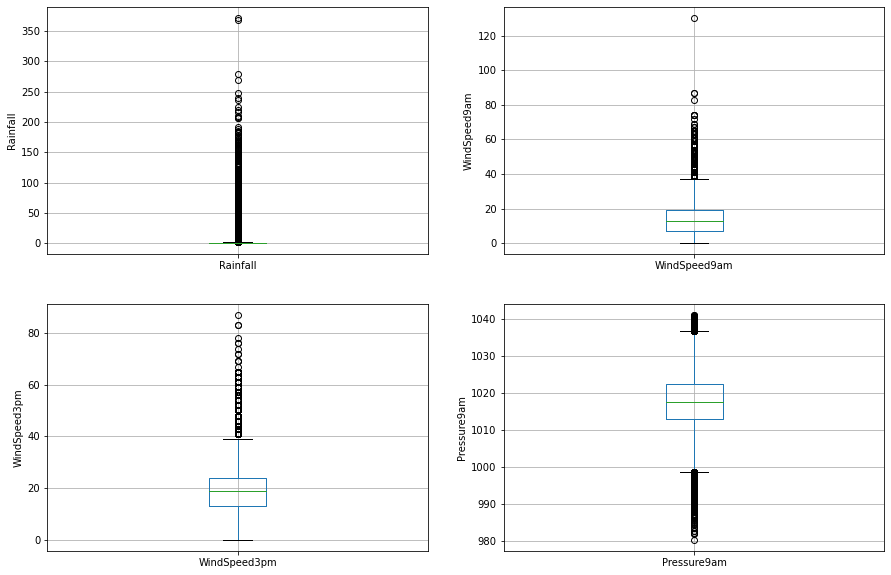

In [19]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(2, 2, 4)
fig = data.boxplot(column='Pressure9am')
fig.set_title('')
fig.set_ylabel('Pressure9am')

Text(0, 0.5, 'Pressure3pm')

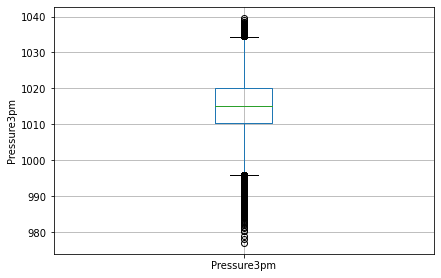

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = data.boxplot(column='Pressure3pm')
fig.set_title('')
fig.set_ylabel('Pressure3pm')

Text(0, 0.5, 'RainTomorrow')

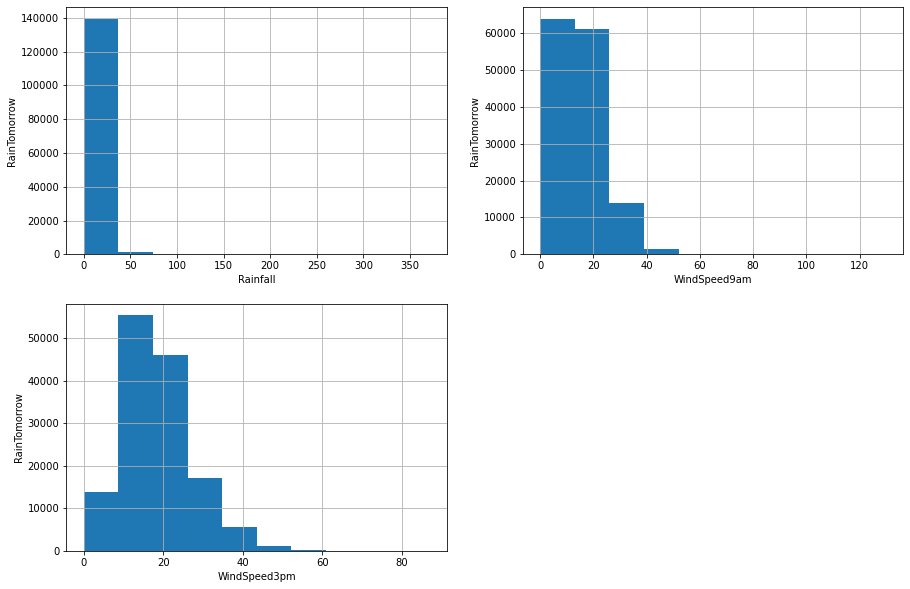

In [21]:
# plot histogram to check distribution
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Text(0, 0.5, 'RainTomorrow')

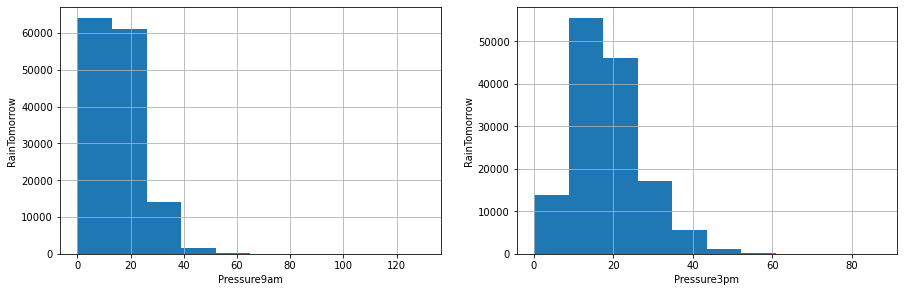

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('Pressure9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('Pressure3pm')
fig.set_ylabel('RainTomorrow')

In [23]:
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

There are clear outiers and the data for these variables are skewed

In [24]:
X = data.loc[:,data.columns != 'RainTomorrow']
Y = data.loc[:,data.columns == 'RainTomorrow']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=27)

In [25]:
#addition for oversample experiment
X_os = pd.concat([Y_train, X_train], axis=1)
X_ds = pd.concat([Y_train, X_train], axis=1)

In [26]:
X_os.isnull().sum()

RainTomorrow         0
Location             0
MinTemp            517
MaxTemp            252
Rainfall          1116
WindGustDir       7436
WindGustSpeed     7388
WindDir9am        8037
WindDir3pm        3018
WindSpeed9am      1090
WindSpeed3pm      2097
Humidity9am       1440
Humidity3pm       2903
Pressure9am      11271
Pressure3pm      11233
Temp9am            728
Temp3pm           2189
RainToday         1116
Year                 0
Month                0
Day                  0
dtype: int64

In [27]:
X_train.shape,X_test.shape,X_os.shape

((113754, 20), (28439, 20), (113754, 21))

Start feature engineering

In [28]:
#Engineerng missing values in numerical variables
X_train[numerical].isnull().sum()

MinTemp            517
MaxTemp            252
Rainfall          1116
WindGustSpeed     7388
WindSpeed9am      1090
WindSpeed3pm      2097
Humidity9am       1440
Humidity3pm       2903
Pressure9am      11271
Pressure3pm      11233
Temp9am            728
Temp3pm           2189
Year                 0
Month                0
Day                  0
dtype: int64

In [29]:
X_test[numerical].isnull().sum()

MinTemp           120
MaxTemp            70
Rainfall          290
WindGustSpeed    1882
WindSpeed9am      258
WindSpeed3pm      533
Humidity9am       334
Humidity3pm       707
Pressure9am      2743
Pressure3pm      2748
Temp9am           176
Temp3pm           537
Year                0
Month               0
Day                 0
dtype: int64

In [30]:
X_os[numerical].isnull().sum()

MinTemp            517
MaxTemp            252
Rainfall          1116
WindGustSpeed     7388
WindSpeed9am      1090
WindSpeed3pm      2097
Humidity9am       1440
Humidity3pm       2903
Pressure9am      11271
Pressure3pm      11233
Temp9am            728
Temp3pm           2189
Year                 0
Month                0
Day                  0
dtype: int64

In [31]:
X_ds[numerical].isnull().sum()

MinTemp            517
MaxTemp            252
Rainfall          1116
WindGustSpeed     7388
WindSpeed9am      1090
WindSpeed3pm      2097
Humidity9am       1440
Humidity3pm       2903
Pressure9am      11271
Pressure3pm      11233
Temp9am            728
Temp3pm           2189
Year                 0
Month                0
Day                  0
dtype: int64

Assuming that the missing variables are completely random. Going to input median value into each null value since the mean value would be skewed by the outliers. Possible change is to calc median based off location not whole dataset

In [32]:
for df1 in [X_train, X_test, X_os, X_ds]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)    

C:\Users\jcsan\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [33]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [34]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [35]:
X_os[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [36]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [37]:
X_train[categorical].isnull().sum()

Location          0
WindGustDir    7436
WindDir9am     8037
WindDir3pm     3018
RainToday      1116
dtype: int64

In [38]:
X_test[categorical].isnull().sum()

Location          0
WindGustDir    1894
WindDir9am     1976
WindDir3pm      760
RainToday       290
dtype: int64

In [39]:
X_os[categorical].isnull().sum()

Location          0
WindGustDir    7436
WindDir9am     8037
WindDir3pm     3018
RainToday      1116
dtype: int64

In [40]:
# put most common entry into null values

for df2 in [X_train, X_test, X_os, X_ds]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [41]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [42]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [43]:
X_os[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [44]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [45]:
X_os.isnull().sum()

RainTomorrow     0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [46]:
X_os.shape

(113754, 21)

In [47]:
#adjust RainToday variable to account for NA values

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_os = encoder.fit_transform(X_os)

X_ds = encoder.fit_transform(X_ds)

C:\Users\jcsan\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\jcsan\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\jcsan\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [48]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [49]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [50]:
X_os = pd.concat([X_os[numerical], X_os[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_os.Location), 
                     pd.get_dummies(X_os.WindGustDir),
                     pd.get_dummies(X_os.WindDir9am),
                     pd.get_dummies(X_os.WindDir3pm),
                     X_os.RainTomorrow], axis=1)

X_ds = pd.concat([X_ds[numerical], X_ds[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_ds.Location), 
                     pd.get_dummies(X_ds.WindGustDir),
                     pd.get_dummies(X_ds.WindDir9am),
                     pd.get_dummies(X_ds.WindDir3pm),
                     X_ds.RainTomorrow], axis=1)

In [51]:
X_os.shape

(113754, 115)

In [52]:
col = X_train.columns

In [53]:
#scaler_os = MinMaxScaler()
#X_os = scaler_os.fit_transform(X_os)
X_test_os = X_test
X_test_ds = X_test

In [54]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train = pd.DataFrame(X_train, columns=[col])
X_test = pd.DataFrame(X_test, columns=[col])

#X_os = pd.DataFrame(X_os, columns=[col_os])

In [56]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.487693,0.537714,0.006348,0.262687,0.107717,0.214165,0.688945,0.515198,0.614228,0.610648,...,0.054345,0.059901,0.067409,0.102001,0.064050,0.056227,0.064270,0.069571,0.060675,0.065650
std,0.150712,0.136421,0.022906,0.101825,0.068143,0.100210,0.189413,0.205385,0.111341,0.106852,...,0.226699,0.237305,0.250729,0.302651,0.244844,0.230360,0.245235,0.254424,0.238734,0.247671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.435701,0.000000,0.193798,0.053846,0.149425,0.570000,0.370000,0.545455,0.542400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483491,0.525912,0.000000,0.255814,0.100000,0.218391,0.700000,0.520000,0.613223,0.609600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.596698,0.633397,0.001632,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.676800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
Y_train.describe()

,RainTomorrow
count,113754.00000
mean,0.22401
std,0.41693
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


In [58]:
# train a logistic regression model on the training set
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, Y_train)

C:\Users\jcsan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [59]:
y_pred_test = logreg.predict(X_test)

In [60]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test)))

Model accuracy score: 0.8423


In [61]:
# compare training and testing
print('Training set score: {:.4f}'.format(logreg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, Y_test)))

Training set score: 0.8463
Test set score: 0.8423


In [62]:
#train model 1
from sklearn.neural_network import MLPClassifier
from numpy import ravel

#np.ravel(Y_test)
#np.ravel(Y_train)

clf = MLPClassifier(activation='logistic',solver='sgd', max_iter=10000, random_state=1)
clf.fit(X_train, Y_train)
accuracy = accuracy_score(clf.predict(X_test), Y_test)
print('my obtained accuracy on MLPClassifier: {0}'.format(accuracy))

C:\Users\jcsan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


my obtained accuracy on MLPClassifier: 0.8394809944090861


In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)
accuracy = accuracy_score(rfc.predict(X_test), Y_test)
print('my obtained accuracy on RandomForestsClassifier: {0}'.format(accuracy))

<ipython-input-63-e88eb4891560>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


my obtained accuracy on RandomForestsClassifier: 0.8502057034354232


In [64]:
"""correlation = data.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()"""

"correlation = data.corr()\nplt.figure(figsize=(16,12))\nplt.title('Correlation Heatmap of Rain in Australia Dataset')\nax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')\nax.set_xticklabels(ax.get_xticklabels(), rotation=90)\nax.set_yticklabels(ax.get_yticklabels(), rotation=30)           \nplt.show()"

In [65]:
"""num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()"""

"num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']\nsns.pairplot(data[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')\nplt.show()"

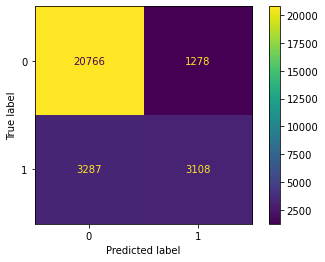

In [66]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

In [67]:
Y_train.describe

<bound method NDFrame.describe of         RainTomorrow
56024              0
127325             1
26527              1
63346              1
135253             0
...              ...
4928               1
15221              0
37370              1
121387             0
5225               0

[113754 rows x 1 columns]>

In [68]:
X_train.describe

<bound method NDFrame.describe of          MinTemp   MaxTemp  Rainfall WindGustSpeed WindSpeed9am WindSpeed3pm  \
0       0.285377  0.264875  0.015778      0.255814     0.084615     0.252874   
1       0.509434  0.426104  0.016866      0.271318     0.069231     0.218391   
2       0.474057  0.408829  0.000000      0.325581     0.169231     0.195402   
3       0.443396  0.556622  0.000000      0.271318     0.046154     0.298851   
4       0.353774  0.470250  0.000000      0.224806     0.000000     0.218391   
...          ...       ...       ...           ...          ...          ...   
113749  0.462264  0.422265  0.003264      0.193798     0.053846     0.126437   
113750  0.502358  0.556622  0.000000      0.255814     0.069231     0.045977   
113751  0.393868  0.539347  0.000000      0.426357     0.130769     0.149425   
113752  0.299528  0.439539  0.000000      0.124031     0.069231     0.103448   
113753  0.478774  0.560461  0.029380      0.155039     0.100000     0.126437   

     

In [69]:
from sklearn.utils import resample
#seperate minority and majority classes
#X = X.dropna()

X_os.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
                ..
SW               0
W                0
WNW              0
WSW              0
RainTomorrow     0
Length: 115, dtype: int64

In [70]:
X_os.shape

(113754, 115)

In [71]:
X_train.shape

(113754, 114)

In [72]:
no = ['0']
yes = ['1']

In [73]:
X_os

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,RainTomorrow
56024,3.6,9.0,5.8,39.0,11.0,22.0,98.0,80.0,1023.6,1024.3,...,0,0,0,0,0,0,0,0,1,0
127325,13.1,17.4,6.2,41.0,9.0,19.0,99.0,63.0,1017.7,1015.9,...,0,0,0,0,0,1,0,0,0,1
26527,11.6,16.5,0.0,48.0,22.0,17.0,56.0,68.0,1017.6,1015.2,...,0,0,0,1,0,0,0,0,0,1
63346,10.3,24.2,0.0,41.0,6.0,26.0,81.0,40.0,1015.2,1010.4,...,0,0,0,0,0,0,0,0,1,1
135253,6.5,19.7,0.0,35.0,0.0,19.0,93.0,64.0,1017.6,1015.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,11.1,17.2,1.2,31.0,7.0,11.0,100.0,92.0,1020.5,1018.7,...,0,0,0,0,0,0,1,0,0,1
15221,12.8,24.2,0.0,39.0,9.0,4.0,62.0,79.0,1017.6,1015.2,...,1,0,0,0,0,0,0,0,0,0
37370,8.2,23.3,0.0,61.0,17.0,13.0,75.0,86.0,1018.4,1012.3,...,0,0,0,0,0,0,0,0,0,1
121387,4.2,18.1,0.0,22.0,9.0,9.0,82.0,45.0,1030.8,1027.1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
no_rain_tomorrow = X_os[X_os.RainTomorrow.isin(no)]
rain_tomorrow = X_os[X_os.RainTomorrow.isin(yes)]

no_rain_tomorrow.shape, rain_tomorrow.shape

((88272, 115), (25482, 115))

In [75]:
upsample = resample(rain_tomorrow, replace = True, n_samples = int(len(no_rain_tomorrow)), random_state=27)

upsample_data = pd.concat([no_rain_tomorrow, upsample])
upsample_data.RainTomorrow.value_counts()

1    88272
0    88272
Name: RainTomorrow, dtype: int64

In [76]:
downsample = resample(no_rain_tomorrow, replace = True, n_samples = int(len(rain_tomorrow)), random_state=27)
downsample_data = pd.concat([downsample, rain_tomorrow])
downsample_data.RainTomorrow.value_counts()

1    25482
0    25482
Name: RainTomorrow, dtype: int64

In [77]:
y_train_upsample = upsample_data.RainTomorrow
X_train_upsample = upsample_data.drop('RainTomorrow', axis=1)
y_train_upsample.shape, X_train_upsample.shape

((176544,), (176544, 114))

In [78]:
y_train_downsample = downsample_data.RainTomorrow
X_train_downsample = downsample_data.drop('RainTomorrow', axis=1)
y_train_downsample.shape, X_train_downsample.shape

((50964,), (50964, 114))

In [79]:
"""#test is standard better than MinMax
from sklearn.preprocessing import StandardScaler


scaler = MinMaxScaler()
X_train_upsample = scaler.fit_transform(X_train_upsample)
X_test_os = scaler.transform(X_test_os)"""

'#test is standard better than MinMax\nfrom sklearn.preprocessing import StandardScaler\n\n\nscaler = MinMaxScaler()\nX_train_upsample = scaler.fit_transform(X_train_upsample)\nX_test_os = scaler.transform(X_test_os)'

In [80]:
rfc_upsample = RandomForestClassifier(random_state=0)
rfc_upsample.fit(X_train_upsample, y_train_upsample)
accuracy = accuracy_score(rfc_upsample.predict(X_test_os), Y_test)
print('my obtained accuracy on RandomForestsClassifier: {0}'.format(accuracy))

my obtained accuracy on RandomForestsClassifier: 0.8521748303386195


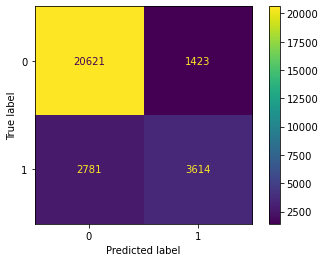

In [81]:
plot_confusion_matrix(rfc_upsample, X_test_os, Y_test)
plt.show()

In [82]:
logreg_upsample = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg_upsample.fit(X_train_upsample, y_train_upsample)
y_pred_test_2 = logreg_upsample.predict(X_test_os)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test_2)))

Model accuracy score: 0.7874


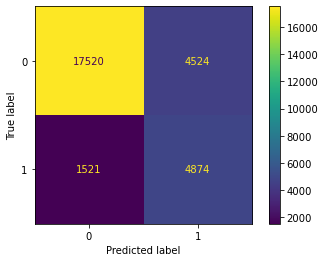

In [83]:
plot_confusion_matrix(logreg_upsample, X_test_os, Y_test)
plt.show()

In [84]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers import InputLayer
from keras.optimizers import Adam

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
y_train_upsample.shape, X_train_upsample.shape

((176544,), (176544, 114))

In [86]:
input_shape = (114)

In [87]:
model = Sequential()

model.add(Dense(114,input_shape=(114,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer="adam",
              loss="binary_crossentropy", 
              metrics=["accuracy", tf.keras.metrics.AUC()])

model.fit(X_train, Y_train, epochs=20, batch_size=64, verbose = 1)

Epoch 1/20
1778/1778 [==============================] - 4s 2ms/step - loss: 0.4251 - accuracy: 0.8145 - auc: 0.7884
Epoch 2/20
1778/1778 [==============================] - 3s 2ms/step - loss: 0.3595 - accuracy: 0.8473 - auc: 0.8624
Epoch 3/20
1778/1778 [==============================] - 3s 2ms/step - loss: 0.3486 - accuracy: 0.8524 - auc: 0.8727
Epoch 4/20
1778/1778 [==============================] - 3s 2ms/step - loss: 0.3385 - accuracy: 0.8548 - auc: 0.8798
Epoch 5/20
1778/1778 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8573 - auc: 0.8807
Epoch 6/20
1778/1778 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.8582 - auc: 0.8860
Epoch 7/20
1778/1778 [==============================] - 3s 2ms/step - loss: 0.3276 - accuracy: 0.8608 - auc: 0.8891
Epoch 8/20
1778/1778 [==============================] - 3s 2ms/step - loss: 0.3275 - accuracy: 0.8606 - auc: 0.8884
Epoch 9/20
1778/1778 [==============================] - 3s 2ms/step - lo

In [88]:
y_pred = model.predict(X_test)

y_pred = np.rint(y_pred)

print(classification_report(Y_test, y_pred))

cm = confusion_matrix(Y_test, y_pred)

print(cm)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22044
           1       0.72      0.57      0.63      6395

    accuracy                           0.85     28439
   macro avg       0.80      0.75      0.77     28439
weighted avg       0.85      0.85      0.85     28439

[[20649  1395]
 [ 2776  3619]]


In [99]:
model2 = Sequential()

model2.add(Dense(114,input_shape=(114,),activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(256, activation='relu'))
#model2.add(Dropout(0.1))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(32, activation='relu'))
#model2.add(Dropout(0.1))
model2.add(Dense(1, activation='sigmoid'))


model2.compile(optimizer="adam",
              loss="binary_crossentropy", 
              metrics=["accuracy"])
history = model2.fit(X_train_upsample, y_train_upsample, epochs=50, batch_size = 256, verbose = 1)


Epoch 1/50
690/690 [==============================] - 2s 2ms/step - loss: 1.9898 - accuracy: 0.5184
Epoch 2/50
690/690 [==============================] - 2s 2ms/step - loss: 0.5956 - accuracy: 0.6786
Epoch 3/50
690/690 [==============================] - 2s 2ms/step - loss: 0.5203 - accuracy: 0.7450
Epoch 4/50
690/690 [==============================] - 2s 2ms/step - loss: 0.5024 - accuracy: 0.7564
Epoch 5/50
690/690 [==============================] - 2s 2ms/step - loss: 0.4920 - accuracy: 0.7602
Epoch 6/50
690/690 [==============================] - 2s 2ms/step - loss: 0.4873 - accuracy: 0.7638
Epoch 7/50
690/690 [==============================] - 2s 2ms/step - loss: 0.4845 - accuracy: 0.7667
Epoch 8/50
690/690 [==============================] - 2s 2ms/step - loss: 0.4798 - accuracy: 0.7666
Epoch 9/50
690/690 [==============================] - 2s 2ms/step - loss: 0.4765 - accuracy: 0.7692
Epoch 10/50
690/690 [==============================] - 2s 2ms/step - loss: 0.4735 - accuracy: 0.7693

In [100]:
y_pred = model2.predict(X_test_os)

y_pred = np.rint(y_pred)

print(classification_report(Y_test, y_pred))

cm = confusion_matrix(Y_test, y_pred)

print(cm)

              precision    recall  f1-score   support

           0       0.94      0.69      0.79     22044
           1       0.44      0.85      0.58      6395

    accuracy                           0.72     28439
   macro avg       0.69      0.77      0.69     28439
weighted avg       0.83      0.72      0.74     28439

[[15113  6931]
 [  982  5413]]


In [91]:
model3 = Sequential()

model3.add(Dense(114,input_shape=(114,),activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(256, activation='relu'))
#model3.add(Dropout(0.1))
model3.add(Dense(128, activation='relu'))
#model3.add(Dropout(0.1))
model3.add(Dense(32, activation='relu'))
#model3.add(Dropout(0.1))
model3.add(Dense(1, activation='sigmoid'))


model3.compile(optimizer="adam",
              loss="binary_crossentropy", 
              metrics=["accuracy"])

history = model3.fit(X_train_downsample, y_train_downsample, epochs=50, batch_size = 256, verbose = 1)

y_pred = model3.predict(X_test_os)

y_pred = np.rint(y_pred)

print(classification_report(Y_test, y_pred))

cm = confusion_matrix(Y_test, y_pred)

print(cm)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 5.6197 - accuracy: 0.5086
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.8191 - accuracy: 0.5280
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6085
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.6907
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7236
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7270
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7368
Epoch 8/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7462
Epoch 9/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7474
Epoch 10/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.7541

In [ ]:
#%% Synthetic Minority Oversampling Technique (SMOTE)

from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train.to_numpy(), Y_train.to_numpy().ravel())

model2 = Sequential()

model2.add(Dense(32,input_shape=(32, 114),activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation='sigmoid'))


model2.compile(optimizer="adam",
              loss="binary_crossentropy", 
              metrics=["accuracy"])

tracker = model2.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test,Y_test))


y_pred = model2.predict(X_test)

y_pred = np.rint(y_pred)

print(classification_report(Y_test, y_pred))

cm = confusion_matrix(Y_test, y_pred)

print(cm)

Epoch 1/20
5517/5517 [==============================] - 6s 1ms/step - loss: 0.4989 - accuracy: 0.7531 - val_loss: 0.4247 - val_accuracy: 0.8008
Epoch 2/20
5517/5517 [==============================] - 6s 1ms/step - loss: 0.4118 - accuracy: 0.8101 - val_loss: 0.4549 - val_accuracy: 0.7838
Epoch 3/20
5517/5517 [==============================] - 6s 1ms/step - loss: 0.4027 - accuracy: 0.8148 - val_loss: 0.4389 - val_accuracy: 0.7890
Epoch 4/20
5517/5517 [==============================] - 6s 1ms/step - loss: 0.3907 - accuracy: 0.8236 - val_loss: 0.4318 - val_accuracy: 0.7892
Epoch 5/20
5517/5517 [==============================] - 6s 1ms/step - loss: 0.3846 - accuracy: 0.8259 - val_loss: 0.4363 - val_accuracy: 0.8058
Epoch 6/20
5517/5517 [==============================] - 6s 1ms/step - loss: 0.3820 - accuracy: 0.8280 - val_loss: 0.4167 - val_accuracy: 0.8023
Epoch 7/20
5517/5517 [==============================] - 6s 1ms/step - loss: 0.3778 - accuracy: 0.8293 - val_loss: 0.4060 - val_accuracy:

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train_res, y_train_res)
y_pred_test_2 = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_2)))

plot_confusion_matrix(logreg, X_test, y_test)
plt.show()